In [1]:
!jt -t grade3

# Module 3 Final Project

In [1]:
import pandas as pd
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
solar = pd.read_csv('solar.csv')

In [36]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516 entries, 0 to 11515
Data columns (total 32 columns):
region_name                             11516 non-null int64
state_name                              11516 non-null object
lat_max                                 11516 non-null float64
lat_min                                 11516 non-null float64
lng_max                                 11516 non-null float64
lng_min                                 11516 non-null float64
lat_avg                                 11516 non-null float64
lng_avg                                 11516 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    11516 non-null float64
count_qualified                         11516 non-null int64
percent_covered                         11516 non-null float64
percent_qualified                       11516 non-null float64
number_of_panels_n                      11516 non-null int64
number_of_panels_s                      11516 non-null int64
number_of_panels_e

In [37]:
solar.dropna()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
19,19149,Pennsylvania,40.051229,40.026879,-75.041356,-75.092596,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417)
20,74050,Oklahoma,36.077670,36.076572,-96.066813,-96.067402,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,POINT(-96.0671000555555 36.0771932333333)
21,19120,Pennsylvania,40.052709,40.012403,-75.096987,-75.138747,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811)
22,19132,Pennsylvania,40.005893,39.986358,-75.150639,-75.190697,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579)
23,19134,Pennsylvania,40.007334,39.977417,-75.087213,-75.131005,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632602,40.631640,-75.390448,-75.394455,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000e+00,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896309,33.895752,-118.376801,-118.378354,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,1.841525e+04,1.295576e+05,6.040279e+04,9.014655e+04,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226916,35.226038,-80.844785,-80.845823,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1.585372e+03,6.776846e+03,5.439028e+03,1.563796e+04,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [38]:
len(solar.columns)

32

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
solar

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-77.0045229333333 38.8753456)
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-78.9309058462436 39.6510141030593)
2,24069,Virginia,36.655148,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-79.6405031730145 36.5987864088448)
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-81.3149169875 37.331933825)
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.000000,0,0,0,0,0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,0,POINT(-79.0816239424634 34.9169522628768)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11511,18025,Pennsylvania,40.632602,40.631640,-75.390448,-75.394455,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000,0.000000,0.000000,0.000000,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,POINT(-75.39277012 40.6321787)
11512,91182,California,34.149359,34.148787,-118.140291,-118.141023,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000,121202.463721,23272.988171,34209.874878,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,POINT(-118.140715083333 34.148964)
11513,90261,California,33.896309,33.895752,-118.376801,-118.378354,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,18415.250519,129557.577319,60402.787781,90146.549121,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,POINT(-118.37754686 33.89616182)
11514,28281,North Carolina,35.226916,35.226038,-80.844785,-80.845823,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1585.371503,6776.846112,5439.027979,15637.955621,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,POINT(-80.8452678 35.2264376833333)


In [41]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11516 entries, 0 to 11515
Data columns (total 32 columns):
region_name                             11516 non-null int64
state_name                              11516 non-null object
lat_max                                 11516 non-null float64
lat_min                                 11516 non-null float64
lng_max                                 11516 non-null float64
lng_min                                 11516 non-null float64
lat_avg                                 11516 non-null float64
lng_avg                                 11516 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    11516 non-null float64
count_qualified                         11516 non-null int64
percent_covered                         11516 non-null float64
percent_qualified                       11516 non-null float64
number_of_panels_n                      11516 non-null int64
number_of_panels_s                      11516 non-null int64
number_of_panels_e

In [42]:
solar.groupby('state_name')['yearly_sunlight_kwh_total'].describe()

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
Aguadilla,3.0,5.328143e+07,7.180826e+07,5.243464e+04,1.244496e+07,2.483749e+07,7.989593e+07,1.349544e+08
Alabama,252.0,9.780543e+07,9.996523e+07,8.872634e+03,1.136099e+07,6.596215e+07,1.463428e+08,4.479820e+08
Alaska,19.0,5.732035e+07,4.133662e+07,2.617453e+04,1.644200e+07,7.877428e+07,8.905623e+07,1.265685e+08
Arecibo,2.0,6.197849e+07,4.753305e+07,2.836755e+07,4.517302e+07,6.197849e+07,7.878397e+07,9.558944e+07
Arizona,196.0,3.012398e+08,1.877538e+08,1.296818e+05,1.476746e+08,3.124264e+08,4.290566e+08,8.755768e+08
...,...,...,...,...,...,...,...,...
Virginia,248.0,9.319791e+07,9.830071e+07,2.405863e+03,8.287541e+06,6.140939e+07,1.566888e+08,4.446540e+08
Washington,259.0,1.059082e+08,8.782710e+07,4.538981e+03,3.537438e+07,9.604538e+07,1.515962e+08,6.099479e+08
West Virginia,81.0,4.021468e+07,5.348267e+07,1.991006e+04,1.339463e+06,1.638958e+07,6.172467e+07,2.707920e+08


In [43]:
solar.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets',
       'carbon_offset_metric_tons', 'existing_installs_count', 'center_point'],
      dtype='object')

### Column Descriptions (where applicable)
* `region_name` - zip code
* `lat_avg` & `lng_avg` - center point of indicated locus
* `yearly_sunlight_kwh_kw_threshold_avg` - 
* `count_qualified` - # of buildings in Google Maps that are suitable for solar
* `percent_covered` - 



'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets',
       'carbon_offset_metric_tons', 'existing_installs_count', 'center_point'

In [44]:
# Creating a list of states + WDC to compare to the data
states = ['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado','District of Columbia',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']

In [45]:
# Creating a new column called 'US' which contains a binary variable
# 0 = not in the list, 1 = in the list
# Comparing 'state_name' column to states list to remove territories
solar['US'] = solar.state_name.isin(states).astype(int)

In [46]:
solar.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
0,20303,District of Columbia,38.876371,38.874446,-77.003766,-77.005605,38.875346,-77.004523,1037.00,0,33.333333,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-77.0045229333333 38.8753456),1
1,21532,Maryland,39.722246,39.569701,-78.860691,-79.091712,39.651014,-78.930906,971.55,0,0.020812,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-78.9309058462436 39.6510141030593),1
2,24069,Virginia,36.655148,36.541640,-79.509898,-79.702540,36.598786,-79.640503,1068.45,0,0.090253,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.6405031730145 36.5987864088448),1
3,24724,West Virginia,37.359420,37.327022,-81.282143,-81.338330,37.331934,-81.314917,1028.50,0,62.500000,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-81.3149169875 37.331933825),1
4,28357,North Carolina,34.961358,34.857796,-79.003998,-79.160387,34.916952,-79.081624,1095.65,0,0.086133,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,POINT(-79.0816239424634 34.9169522628768),1


In [47]:
# Removing anything not in the states list
solar = solar[solar['US'] == 1]

In [48]:
solar.reset_index(drop=True, inplace=True)

In [49]:
solar.shape

(11442, 33)

In [50]:
# Dropping redundant columns
solar.drop(columns=['lat_max', 'lat_min', 'lng_max', 'lng_min'], axis=1, inplace=True)

In [51]:
# Removing the 'POINT' prefix in every line for column 'center_point'
# ONLY RUN THIS ONCE!!!
solar.loc[:,('center_point')] = solar['center_point'].map(lambda x: x[5:])

In [52]:
solar.head()

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
0,20303,District of Columbia,38.875346,-77.004523,1037.00,0,33.333333,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-77.0045229333333 38.8753456),1
1,21532,Maryland,39.651014,-78.930906,971.55,0,0.020812,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-78.9309058462436 39.6510141030593),1
2,24069,Virginia,36.598786,-79.640503,1068.45,0,0.090253,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-79.6405031730145 36.5987864088448),1
3,24724,West Virginia,37.331934,-81.314917,1028.50,0,62.500000,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-81.3149169875 37.331933825),1
4,28357,North Carolina,34.916952,-79.081624,1095.65,0,0.086133,0.0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0,(-79.0816239424634 34.9169522628768),1


In [53]:
solar.dropna()

,region_name,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point,US
19,19149,Pennsylvania,40.037404,-75.065705,997.90,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11.0,164342.0,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,(-75.0657051746548 40.0374044403417),1
20,74050,Oklahoma,36.077193,-96.067100,1097.35,7,100.000000,77.777778,0,34,27,75,20,11.0,156.0,2.75,39.00,0.000000e+00,1.143788e+04,8.277247e+03,2.414388e+04,6.383952e+03,3668.076221,5.024297e+04,"[[0,5],[5,1],[15,1]]",33.988079,0,(-96.0671000555555 36.0771932333333),1
21,19120,Pennsylvania,40.034398,-75.120887,997.90,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12.0,263706.0,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,(-75.120887243506 40.0343982932811),1
22,19132,Pennsylvania,39.995681,-75.169645,997.90,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12.0,210495.0,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,(-75.169645159245 39.9956814907579),1
23,19134,Pennsylvania,39.992451,-75.111935,997.90,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12.0,444312.0,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,(-75.1119347717865 39.9924510629131),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11437,18025,Pennsylvania,40.632179,-75.392770,980.05,5,100.000000,100.000000,0,0,0,0,9637,794.0,9637.0,198.50,2409.25,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.719113e+06,223869.943237,2.719113e+06,"[[50,1],[110,1],[195,1],[915,1],[1125,1]]",1727.889413,0,(-75.39277012 40.6321787),1
11438,91182,California,34.148964,-118.140715,1405.05,5,100.000000,83.333333,0,303,67,100,578,135.0,1048.0,33.75,262.00,0.000000e+00,1.212025e+05,2.327299e+04,3.420987e+04,2.187083e+05,51973.482007,3.973936e+05,"[[5,2],[30,1],[65,1],[145,1]]",108.341821,0,(-118.140715083333 34.148964),1
11439,90261,California,33.896162,-118.377547,1405.05,5,100.000000,100.000000,53,329,165,242,1602,207.0,2391.0,51.75,597.75,1.841525e+04,1.295576e+05,6.040279e+04,9.014655e+04,5.689299e+05,77859.660291,8.674520e+05,"[[45,2],[50,1],[55,1],[390,1]]",236.494332,0,(-118.37754686 33.89616182),1
11440,28281,North Carolina,35.226438,-80.845268,1091.40,5,100.000000,83.333333,6,21,20,49,1706,318.0,1802.0,79.50,450.50,1.585372e+03,6.776846e+03,5.439028e+03,1.563796e+04,5.071857e+05,99568.464185,5.366249e+05,"[[65,2],[75,1],[100,1],[130,1]]",315.023759,0,(-80.8452678 35.2264376833333),1


In [54]:
solar.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'NUMBER OF OCCURENCES FOR EACH STATE')

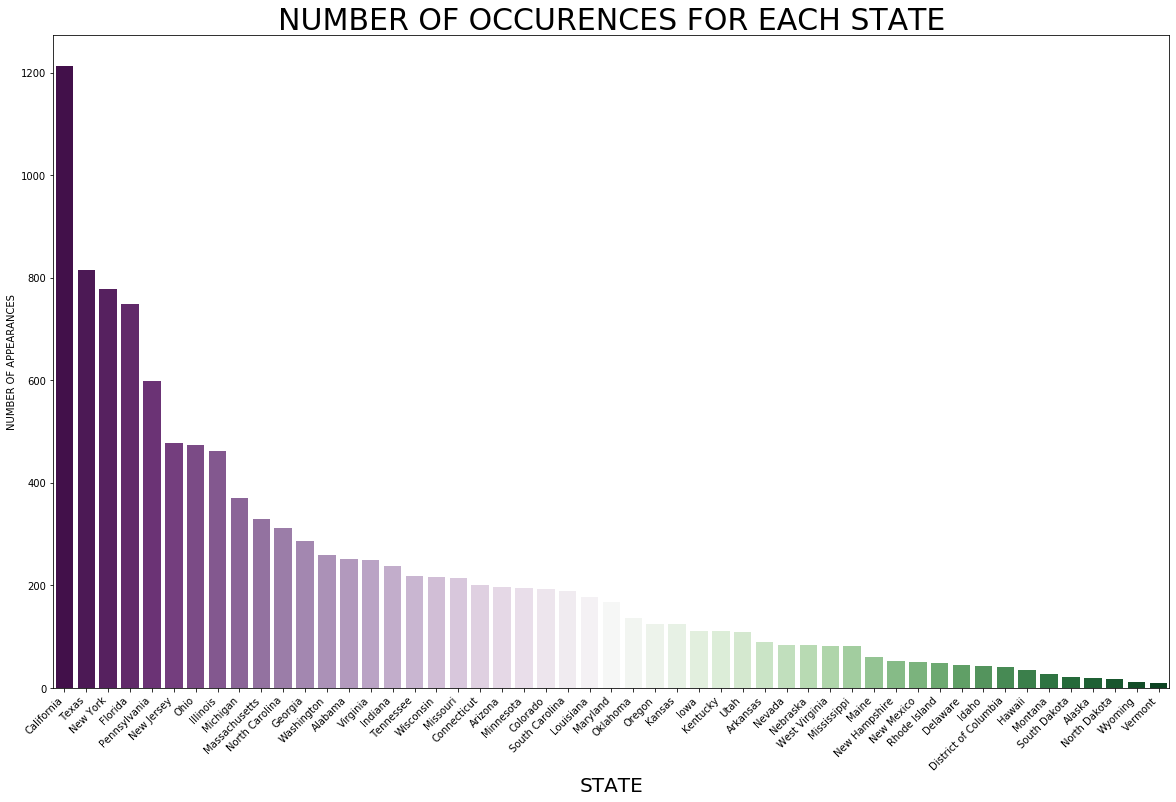

In [55]:
# Plotting the counts of instances from each state
fig, ax = plt.subplots(figsize=(20,12))
state_count = sns.barplot(x=list(solar['state_name'].value_counts().keys()),
                          y=solar['state_name'].value_counts(), palette='PRGn')
state_count.set_xticklabels(state_count.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
plt.xlabel('STATE', size=20)
plt.ylabel('NUMBER OF APPEARANCES')
plt.title('NUMBER OF OCCURENCES FOR EACH STATE', fontsize=30)

In [58]:
# Changing the 'state_name' to a categorical data type
# Creating new numerical column representing the state name
# 0-50 due to inclusion of DC
solar.state_name = pd.Categorical(solar.state_name)
solar['state_cat'] = solar.state_name.cat.codes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
solar.dropna(inplace=True)
solar.reset_index(drop=True, inplace=True)
print(solar.shape)
solar.isnull().sum()

(11423, 30)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


region_name                             0
state_name                              0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 0
number_of_panels_total                  0
kw_median                               0
kw_total                                0
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e                   0
yearly_sunlight_kwh_w                   0
yearly_sunlight_kwh_f                   0
yearly_sunlight_kwh_median              0
yearly_sunlight_kwh_total         